# 1. Data Exploration:

In [57]:
# Import Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
sns.set_theme(style='darkgrid',palette='rainbow')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

In [58]:
# Load your data
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")


In [59]:
# Fill missing values
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].median())

In [60]:
# Drop columns we won't use
train_df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [61]:
# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

In [62]:
# Separate features and target
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [63]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [64]:
# Predict on validation set
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]

In [65]:
# Evaluation metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

ROC AUC Score: 0.8824967824967825


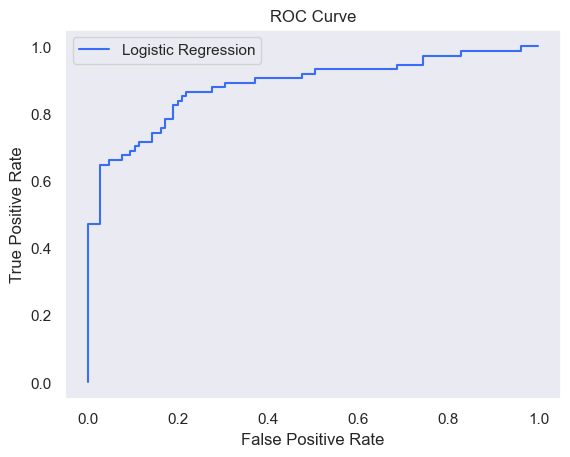

In [66]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [67]:
# Make a copy of test dataset
test_data = test_df.copy()

#  Fill missing numerical columns (if any)
if 'Age' in test_data.columns:
    test_data['Age'] = test_data['Age'].fillna(train_df['Age'].median())

if 'Fare' in test_data.columns:
    test_data['Fare'] = test_data['Fare'].fillna(train_df['Fare'].median())


In [69]:
#  Drop unnecessary columns (only if they exist)
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
test_data = test_data.drop(columns=[col for col in drop_cols if col in test_data.columns], errors='ignore')


In [70]:
#  Encode categorical variable(s)
# Only 'Sex' is present for encoding
if 'Sex' in test_data.columns:
    test_data = pd.get_dummies(test_data, columns=['Sex'], drop_first=True)

In [71]:
# Align test_data columns with training data (X)
test_data = test_data.reindex(columns=X.columns, fill_value=0)

#  Predict survival using the trained model
test_predictions = model.predict(test_data)

#  Output prediction DataFrame
output = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

In [72]:
# Display first few predictions
print(output.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
